In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [2]:
datasets.load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris = datasets.load_iris()
x = iris.data[:,:2] # 데이터 중 처음 2개의 feature[속성] 가져오기
y = iris.target

In [7]:
# multi class 가능하도록 옵셥을 설정
LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
# 2개 중 1개를 예측하는 것이 아니기 때문에 multinomial 사용함

LogisticRegression(C=100000.0, multi_class='multinomial')

In [9]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

In [10]:
logreg.fit(x,y)

LogisticRegression(C=100000.0, multi_class='multinomial')

In [13]:
# 데이터 시각화
x_min, x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5, x[:,1].max() + .5
h = 0.02 # mesh의 step size
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# 격자형 좌표 추출

In [14]:
xx, yy

(array([[3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        ...,
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ]]),
 array([[1.5 , 1.5 , 1.5 , ..., 1.5 , 1.5 , 1.5 ],
        [1.52, 1.52, 1.52, ..., 1.52, 1.52, 1.52],
        [1.54, 1.54, 1.54, ..., 1.54, 1.54, 1.54],
        ...,
        [4.86, 4.86, 4.86, ..., 4.86, 4.86, 4.86],
        [4.88, 4.88, 4.88, ..., 4.88, 4.88, 4.88],
        [4.9 , 4.9 , 4.9 , ..., 4.9 , 4.9 , 4.9 ]]))

In [19]:
xx.shape

(171, 231)

In [17]:
# 추출한 격자형 데이터로 z를 예측하고자 함
# ravel(): 1차원 배열로 바꾸어 줌
# np.c_ : 연결 시 컬럼으로 붙여 줌
# z (모델이 예측한 값) >> iris(붓꽃) 3개의 class를 반환
z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
z

array([0, 0, 0, ..., 2, 2, 2])

In [22]:
z = z.reshape(xx.shape)

In [20]:
xx.shape

(171, 231)

In [23]:
z.shape

(171, 231)

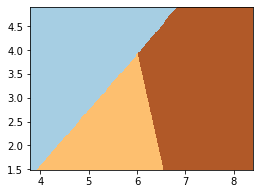

In [25]:
plt.figure(1, figsize=(4,3))
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

Text(0.5, 0, 'Sepal Width')

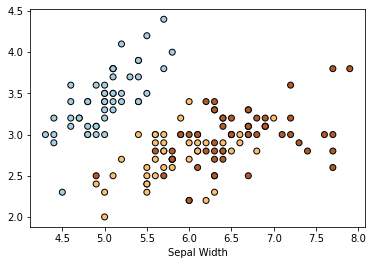

In [27]:
# 원래 iris 관측값인 x를 점으로 찍고 color는 class 표현하고자 함

plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.xlabel('Sepal Width')

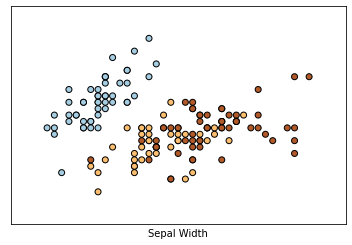

In [28]:
# 원래 iris 관측값인 x를 점으로 찍고 color는 class 표현하고자 함

plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.xlabel('Sepal Width')

# 좌표계의 min, max 설정
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

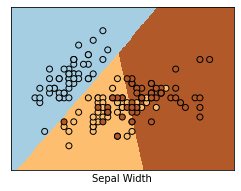

In [29]:
# 최종

plt.figure(1, figsize=(4,3))
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

# 원래 iris 관측값인 x를 점으로 찍고 color는 class 표현하고자 함

plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.xlabel('Sepal Width')

# 좌표계의 min, max 설정
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()